# Time-series Analysis of Air Quality Data in the United States

## IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
from google.cloud import bigquery
from bq_helper import BigQueryHelper

bq_assistant = BigQueryHelper("bigquery-public-data", "epa_historical_air_quality")

## Illinois and California Air Quality Index (AQI) by Pollutant

In [ ]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

In [ ]:
states = ['Illinois','California'] 
pollutants = ['o3','co','so2','pm25_frm']

QUERY = """
    SELECT 
        pollutant.date_local as date_time,
        AVG(pollutant.aqi) as AvgAQI_State
    FROM
      `bigquery-public-data.epa_historical_air_quality.pollutant_daily_summary` as pollutant
      WHERE pollutant.poc = 1 AND  pollutant.state_name = 'State'
    GROUP BY date_time
    ORDER BY date_time ASC
        """

dict_pol={}
for elem_g in pollutants : 
    dict_pol[elem_g] = None 
    for elem_s in states :
        dic = {"State": elem_s, "pollutant": elem_g}
        query = replace_all(QUERY, dic)
        temp = bq_assistant.query_to_pandas(query).set_index('date_time')
        dict_pol[elem_g] = pd.concat([dict_pol[elem_g], temp], axis=1, join='inner')

**O3**

In [ ]:
dict_pol['o3'].head(10)

In [ ]:
dict_pol['co'].plot( y=['AvgAQI_Illinois','AvgAQI_California'], title='Evolution of so2')
plt.show();

**Carbon Monoxide**

In [ ]:
dict_pol['co'].head(10)

In [ ]:
dict_pol['co'].plot( y=['AvgAQI_Illinois','AvgAQI_California'], title='Evolution of so2')
plt.show();

**Sulfur Dioxide**

In [ ]:
dict_pol['so2'].head(10)

In [ ]:
dict_pol['so2'].plot( y=['AvgAQI_Illinois','AvgAQI_California'], title='Evolution of so2')
plt.show();

**PM25**

In [ ]:
dict_pol['pm25_frm'].head(10)

In [ ]:
dict_pol['o3'].plot( y=['AvgAQI_Illinois','AvgAQI_California'], title='Evolution of o3')
plt.show();

## Looking into Chicago pollutants over the years (1990-2017)

In [ ]:
co_chi = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.co_daily_summary` as pollutant
      WHERE 
          pollutant.poc = 1 
          AND  pollutant.state_name = 'Illinois'
          AND  pollutant.city_name = 'Chicago'
    ORDER BY 
        date ASC
        """

so2_chi = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.so2_daily_summary` as pollutant
      WHERE 
          pollutant.poc = 1 
          AND  pollutant.state_name = 'Illinois'
          AND  pollutant.city_name = 'Chicago'
    ORDER BY 
        date ASC
        """

no2_chi = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.no2_daily_summary` as pollutant
      WHERE 
          pollutant.poc = 1 
          AND  pollutant.state_name = 'Illinois'
          AND  pollutant.city_name = 'Chicago'
    ORDER BY 
        date ASC
        """

o3_chi = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.o3_daily_summary` as pollutant
      WHERE 
          pollutant.poc = 1 
          AND  pollutant.state_name = 'Illinois'
          AND  pollutant.city_name = 'Chicago'
    ORDER BY 
        date ASC
        """

pm10_chi = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.pm10_daily_summary` as pollutant
      WHERE 
          pollutant.poc = 1 
          AND  pollutant.state_name = 'Illinois'
          AND  pollutant.city_name = 'Chicago'
    ORDER BY 
        date ASC
        """

pm25_chi = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.pm25_frm_daily_summary` as pollutant
      WHERE 
          pollutant.poc = 1 
          AND  pollutant.state_name = 'Illinois'
          AND  pollutant.city_name = 'Chicago'
    ORDER BY 
        date ASC
        """
co_chi = bq_assistant.query_to_pandas(co_chi)
so2_chi = bq_assistant.query_to_pandas(so2_chi)
no2_chi = bq_assistant.query_to_pandas(no2_chi)
o3_chi = bq_assistant.query_to_pandas(o3_chi)
pm10_chi = bq_assistant.query_to_pandas(pm10_chi)
pm25_chi = bq_assistant.query_to_pandas(pm25_chi)

In [ ]:
co_chi['date'] =  pd.to_datetime(co_chi['date'])
co_chi.set_index('date',drop = True, inplace = True)
co_chi_m = co_chi.groupby(pd.Grouper(freq="M"))
co_chi_month = co_chi_m.mean()

so2_chi['date'] =  pd.to_datetime(so2_chi['date'])
so2_chi.set_index('date',drop = True, inplace = True)
so2_chi_m = so2_chi.groupby(pd.Grouper(freq="M"))
so2_chi_month = so2_chi_m.mean()

no2_chi['date'] =  pd.to_datetime(no2_chi['date'])
no2_chi.set_index('date',drop = True, inplace = True)
no2_chi_m = no2_chi.groupby(pd.Grouper(freq="M"))
no2_chi_month = no2_chi_m.mean()

o3_chi['date'] =  pd.to_datetime(o3_chi['date'])
o3_chi.set_index('date',drop = True, inplace = True)
o3_chi_m = o3_chi.groupby(pd.Grouper(freq="M"))
o3_chi_month = o3_chi_m.mean()

pm10_chi['date'] =  pd.to_datetime(pm10_chi['date'])
pm10_chi.set_index('date',drop = True, inplace = True)
pm10_chi_m = pm10_chi.groupby(pd.Grouper(freq="M"))
pm10_chi_month = pm10_chi_m.mean()

pm25_chi['date'] =  pd.to_datetime(pm25_chi['date'])
pm25_chi.set_index('date',drop = True, inplace = True)
pm25_chi_m = pm25_chi.groupby(pd.Grouper(freq="M"))
pm25_chi_month = pm25_chi_m.mean()

In [111]:
chicago_pollutants = pd.concat([co_chi_month, so2_chi_month, no2_chi_month, o3_chi_month, pm10_chi_month, pm25_chi_month], axis=1, sort=False)
chicago_pollutants.columns = ['CO','SO2','NO2','O3','PM10','PM25']
print(chicago_pollutants.head())
chicago_pollutants.tail(13)

                   CO        SO2        NO2         O3       PM10  PM25
date                                                                   
1990-01-31  19.625000  21.798387  34.576087  11.500000  39.312500   NaN
1990-02-28  18.428571  22.625000  39.250000  18.267857  27.645833   NaN
1990-03-31  14.442308  21.516129  40.182796  22.000000  30.196078   NaN
1990-04-30  17.781818  26.218487  48.944444  26.333333  33.981132   NaN
1990-05-31  17.206897  24.991935  42.666667  34.016129  40.018182   NaN


,CO,SO2,NO2,O3,PM10,PM25
date,,,,,,
2016-09-30,NaN,2.966667,22.016667,37.350000,NaN,29.000000
2016-10-31,NaN,3.064516,23.854839,27.096774,NaN,31.666667
2016-11-30,NaN,1.966667,30.702703,22.533333,NaN,45.066667
2016-12-31,NaN,1.709677,25.967742,18.903226,NaN,31.428571
2017-01-31,NaN,2.032258,26.854839,18.806452,NaN,41.757576
2017-02-28,NaN,3.500000,27.785714,28.379310,NaN,35.333333
2017-03-31,NaN,1.516129,25.274194,33.548387,NaN,27.000000
2017-04-30,NaN,2.400000,29.000000,40.650000,NaN,28.700000
2017-05-31,NaN,2.838710,21.370968,47.877193,NaN,28.281250


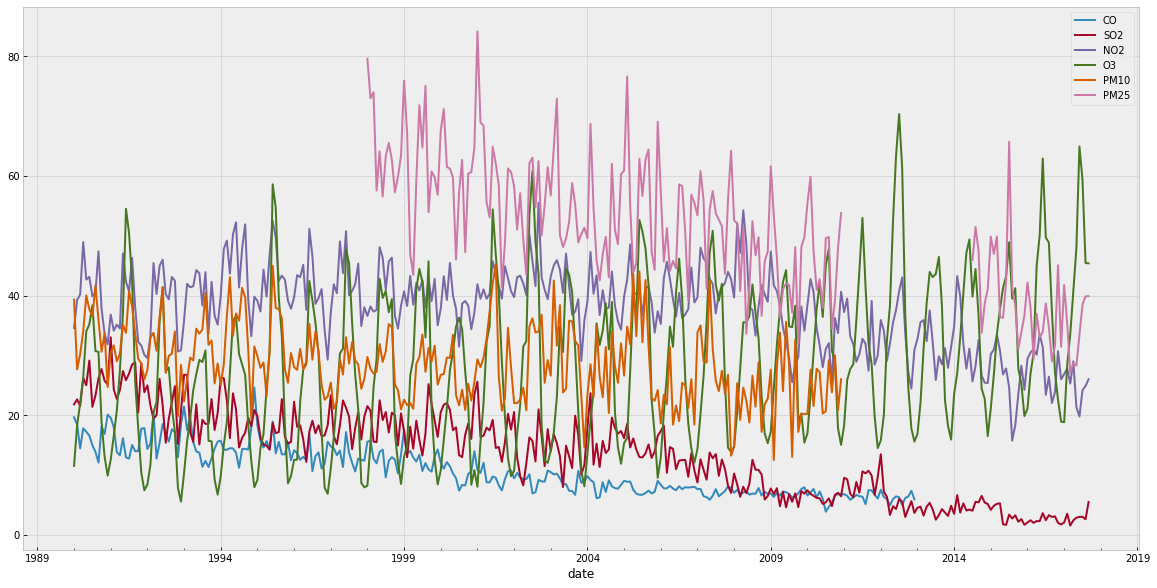

In [112]:
chicago_pollutants.plot(figsize = (20,10))

### Some trend: 
* CO clearly decreasing
* SO2 clearly decreasing
* NO2 levels and decreases
* O3 increasing
* PM 10 Unclear
* PM 2.5 decreasing 

For the unclear trend as well as the differentiated trend, we could do KPSS and ADF tests

* **SO2**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
SO2_decompose = seasonal_decompose(chicago_pollutants['SO2'], model='multiplicative')
fig = SO2_decompose.plot()
fig.set_size_inches(15, 8)

In [ ]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [ ]:
import pyramid.arima as pa

In [ ]:
#type(chicago_pollutants['SO2'].values)
#pa.stationarity.ADFTest.is_stationary(x = chicago_pollutants['SO2'])

In [ ]:
SO2_sarima_train = chicago_pollutants['SO2'].loc['1990-01-31':'2016-09-30']
SO2_sarima_test = chicago_pollutants['SO2'].loc['2016-10-31':]
SO2_sarima_train.head()

In [ ]:
boxcox(chicago_pollutants['SO2'])[1]

In [ ]:
SO2_transformed = pd.DataFrame(boxcox(chicago_pollutants['SO2'])[0],index = chicago_pollutants['SO2'].index,
                              columns=['SO2_transformed'])
SO2_transformed.head()
SO2_transformed_sarima_train = SO2_transformed.loc['1990-01-31':'2016-09-30']
SO2_transformed_sarima_test = SO2_transformed.loc['2016-10-31':]
SO2_transformed_sarima_train.head()

In [ ]:
# SO2_sarima_fit = pa.auto_arima(SO2_sarima_train, start_p=1, start_q=1,
#                             max_p=3, max_q=3, m=12,
#                             start_P=0, seasonal=True,
#                             d=1, D=1, information_criterion = 'aicc', trace=False,
#                             stepwise=True)

In [ ]:
SO2_trans_sarima_fit = pa.auto_arima(SO2_transformed_sarima_train, start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=1, D=1, information_criterion = 'aicc', trace=False,
                            stepwise=True)

In [ ]:
print(SO2_trans_sarima_fit.summary())
print('Model AICc: %f' % SO2_trans_sarima_fit.aicc())

* Ljung-Box test of this model residual resulted in p = 0.48, meaning we don't reject the null hypothesis that the residuals are random.
* AIC of this model 982.137**

In [ ]:
# print(SO2_sarima_fit.summary())
# print('Model AICc: %f' % SO2_sarima_fit.aicc())

* Ljung-Box test of this model residual resulted in p = 0.39, meaning we don't reject the null hypothesis that the residuals are random.
* AIC of this model 1524.632**

In [ ]:
#SO2_sarima_fit.plot_diagnostics(figsize=(15, 12))
#plt.show()

In [ ]:
#from pandas.plotting import autocorrelation_plot
import statsmodels.tsa.api as smt

In [ ]:
pd.DataFrame(SO2_trans_sarima_fit.resid()).hist(figsize=(15,8))
#SO2_trans_sarima_fit.resid.hist(figsize=(15,8))

In [ ]:
#plt.figure(figsize=(15,8))
#autocorrelation_plot(SO2_trans_sarima_fit.resid())

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
smt.graphics.plot_acf(SO2_trans_sarima_fit.resid(), lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(SO2_trans_sarima_fit.resid(), lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [ ]:
SO2_sarima_forecast = SO2_sarima_fit.predict(n_periods = 12)
#type(SO2_sarima_forecast)

In [ ]:
SO2_trans_sarima_forecast = inv_boxcox(SO2_trans_sarima_fit.predict(n_periods = 12),boxcox(chicago_pollutants['SO2'])[1])

In [ ]:
SO2_sarima_forecast_combine = pd.DataFrame({'sarima_pred':SO2_sarima_forecast,'trans_sarima_pred': SO2_trans_sarima_forecast},index = SO2_sarima_test.index)
forecast_test = pd.concat([SO2_sarima_test,SO2_sarima_forecast_combine],axis=1)
forecast_test.plot(figsize=(15,8))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
SO2_sarima_forecast_rmse = np.sqrt(mean_squared_error(SO2_sarima_test, SO2_sarima_forecast))
SO2_sarima_forecast_rmse

In [ ]:
SO2_trans_sarima_forecast_rmse = np.sqrt(mean_squared_error(SO2_sarima_test, SO2_trans_sarima_forecast))
SO2_trans_sarima_forecast_rmse

In [ ]:
#SO2_sarima_rmse = pd.DataFrame({'sarima_rmse':np.sqrt(mean_squared_error(SO2_sarima_test, SO2_sarima_forecast)),'trans_sarima_rmse': np.sqrt(mean_squared_error(SO2_sarima_test, SO2_trans_sarima_forecast))})

* **NO2**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
NO2_adf = adfuller(chicago_pollutants['NO2'], autolag='AIC')
dfoutput = pd.Series(NO2_adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in NO2_adf[4].items():
    dfoutput['Critical Value (%s)'% key] = value
print (dfoutput)

p-value = 0.94, we fail to **reject** the null hypothesis that the process is not stationary

In [ ]:
NO2_decompose = seasonal_decompose(chicago_pollutants['NO2'], model='multiplicative')
fig = NO2_decompose.plot()
fig.set_size_inches(15, 8)

In [ ]:
NO2_sarima_train = chicago_pollutants['NO2'].loc['1990-01-31':'2016-09-30']
NO2_sarima_test = chicago_pollutants['NO2'].loc['2016-10-31':]
NO2_sarima_train.head()

In [ ]:
boxcox(chicago_pollutants['NO2'])[1]

In [ ]:
NO2_transformed = pd.DataFrame(boxcox(chicago_pollutants['NO2'])[0],index = chicago_pollutants['NO2'].index,
                              columns=['NO2_transformed'])
NO2_transformed.head()
NO2_transformed_sarima_train = NO2_transformed.loc['1990-01-31':'2016-09-30']
NO2_transformed_sarima_test = NO2_transformed.loc['2016-10-31':]
NO2_transformed_sarima_train.head()

In [ ]:
 NO2_sarima_fit = pa.auto_arima(NO2_sarima_train, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, information_criterion = 'aicc', trace=False,
                             stepwise=True)

In [ ]:
 print(NO2_sarima_fit.summary())
 print('Model AICc: %f' % NO2_sarima_fit.aicc())

In [ ]:
# NO2_trans_sarima_fit = pa.auto_arima(NO2_transformed_sarima_train, start_p=1, start_q=1,
#                             max_p=3, max_q=3, m=12,
#                             start_P=0, seasonal=True,
#                             d=1, D=1, information_criterion = 'aicc', trace=False,
#                             stepwise=True)

In [ ]:
# print(NO2_trans_sarima_fit.summary())
# print('Model AICc: %f' % NO2_trans_sarima_fit.aicc())

In [ ]:
pd.DataFrame(NO2_sarima_fit.resid()).hist(figsize=(15,8))
pd.DataFrame(NO2_trans_sarima_fit.resid()).hist(figsize=(15,8))

In [ ]:
# plt.figure(figsize=(15,8))
# smt.graphics.plot_acft(NO2_sarima_fit.resid())

In [ ]:
# plt.figure(figsize=(15,8))
# autocorrelation_plot(NO2_trans_sarima_fit.resid())

In [ ]:
NO2_sarima_forecast = NO2_sarima_fit.predict(n_periods = 12)

In [ ]:
NO2_trans_sarima_forecast = inv_boxcox(NO2_trans_sarima_fit.predict(n_periods = 12),boxcox(chicago_pollutants['NO2'])[1])

In [ ]:
NO2_sarima_forecast_combine = pd.DataFrame({'sarima_pred':NO2_sarima_forecast,'trans_sarima_pred': NO2_trans_sarima_forecast},index = NO2_sarima_test.index)
forecast_test = pd.concat([NO2_sarima_test,NO2_sarima_forecast_combine],axis=1)
forecast_test.plot(figsize=(15,8))

In [121]:
NO2_sarima_forecast_rmse = np.sqrt(mean_squared_error(NO2_sarima_test, NO2_sarima_forecast))
NO2_sarima_forecast_rmse

3.7770274455040163

In [122]:
NO2_trans_sarima_forecast_rmse = np.sqrt(mean_squared_error(NO2_sarima_test, NO2_trans_sarima_forecast))
NO2_trans_sarima_forecast_rmse

4.059924598602576

**For NO2, no BC transformation is better**

* **O3**

In [ ]:
O3_decompose = seasonal_decompose(chicago_pollutants['O3'], model='multiplicative')
fig = O3_decompose.plot()
fig.set_size_inches(15, 8)

In [ ]:
O3_sarima_train = chicago_pollutants['O3'].loc['1990-01-31':'2016-09-30']
O3_sarima_test = chicago_pollutants['O3'].loc['2016-10-31':]
O3_sarima_train.head()

In [ ]:
boxcox(chicago_pollutants['O3'])[1]

In [ ]:
O3_transformed = pd.DataFrame(boxcox(chicago_pollutants['O3'])[0],index = chicago_pollutants['O3'].index,
                              columns=['O3_transformed'])
O3_transformed.head()
O3_transformed_sarima_train = O3_transformed.loc['1990-01-31':'2016-09-30']
O3_transformed_sarima_test = O3_transformed.loc['2016-10-31':]
O3_transformed_sarima_train.head()

In [ ]:
# O3_sarima_fit = pa.auto_arima(O3_sarima_train, start_p=1, start_q=1,
#                             max_p=3, max_q=3, m=12,
#                             start_P=0, seasonal=True,
#                             d=1, D=1, information_criterion = 'aicc', trace=False,
#                             stepwise=True)

In [ ]:
print(O3_sarima_fit.summary())
print('Model AICc: %f' % O3_sarima_fit.aicc())

In [ ]:
O3_trans_sarima_fit = pa.auto_arima(O3_transformed_sarima_train, start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=1, D=1, information_criterion = 'aicc', trace=False,
                            stepwise=True)

In [ ]:
print(O3_trans_sarima_fit.summary())
print('Model AICc: %f' % O3_trans_sarima_fit.aicc())

In [ ]:
pd.DataFrame(O3_sarima_fit.resid()).hist(figsize=(15,8))
pd.DataFrame(O3_trans_sarima_fit.resid()).hist(figsize=(15,8))

In [ ]:
# plt.figure(figsize=(15,8))
# autocorrelation_plot(O3_sarima_fit.resid())

In [ ]:
# plt.figure(figsize=(15,8))
# autocorrelation_plot(O3_trans_sarima_fit.resid())

In [ ]:
O3_sarima_forecast = O3_sarima_fit.predict(n_periods = 12)

In [ ]:
O3_trans_sarima_forecast = inv_boxcox(O3_trans_sarima_fit.predict(n_periods = 12),boxcox(chicago_pollutants['O3'])[1])

In [ ]:
O3_sarima_forecast_combine = pd.DataFrame({'sarima_pred':O3_sarima_forecast,'trans_sarima_pred': O3_trans_sarima_forecast},index = O3_sarima_test.index)
forecast_test = pd.concat([O3_sarima_test,O3_sarima_forecast_combine],axis=1)
forecast_test.plot(figsize=(15,8))

In [ ]:
O3_sarima_forecast_rmse = np.sqrt(mean_squared_error(O3_sarima_test, O3_sarima_forecast))
O3_sarima_forecast_rmse

In [ ]:
O3_trans_sarima_forecast_rmse = np.sqrt(mean_squared_error(O3_sarima_test, O3_trans_sarima_forecast))
O3_trans_sarima_forecast_rmse

**For SO2 and Ozone, BC  transformed sarima models are better**

* **CO**

In [ ]:
CO_sarima_train = chicago_pollutants['CO'].loc['1990-01-31':'2011-12-31']
CO_sarima_test = chicago_pollutants['CO'].loc['2012-01-31':'2012-12-31']
CO_sarima_train.dropna(inplace = True)
CO_sarima_train.head()

In [ ]:
len(CO_sarima_train)

In [ ]:
boxcox(chicago_pollutants['CO'].dropna())[1]

In [ ]:
CO_transformed = pd.DataFrame(boxcox(chicago_pollutants['CO'].dropna())[0],index = chicago_pollutants['CO'].dropna().index,
                              columns=['CO_transformed'])
CO_transformed.head()
CO_transformed_sarima_train = CO_transformed.loc['1990-01-31':'2011-12-31']
CO_transformed_sarima_test = CO_transformed.loc['2012-01-31':'2012-12-31']

CO_transformed_sarima_train.head()

In [ ]:
len(CO_transformed_sarima_train)

In [ ]:
# CO_sarima_fit = pa.auto_arima(CO_sarima_train, start_p=1, start_q=1,
#                             max_p=3, max_q=3, m=12,
#                             start_P=0, seasonal=True,
#                             d=1, D=1, information_criterion = 'aicc', trace=False,
#                             stepwise=True)

In [ ]:
print(CO_sarima_fit.summary())
print('Model AICc: %f' % CO_sarima_fit.aicc())

In [ ]:
CO_trans_sarima_fit = pa.auto_arima(CO_transformed_sarima_train, start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=1, D=1, information_criterion = 'aicc', trace=False,
                            stepwise=True)

In [ ]:
print(CO_trans_sarima_fit.summary())
print('Model AICc: %f' % CO_trans_sarima_fit.aicc())

In [ ]:
pd.DataFrame(CO_sarima_fit.resid()).hist(figsize=(15,8))
pd.DataFrame(CO_trans_sarima_fit.resid()).hist(figsize=(15,8))

In [ ]:
# plt.figure(figsize=(15,8))
# autocorrelation_plot(CO_sarima_fit.resid())

In [ ]:
# plt.figure(figsize=(15,8))
# autocorrelation_plot(CO_trans_sarima_fit.resid())

In [ ]:
CO_sarima_forecast = CO_sarima_fit.predict(n_periods = 12)

In [ ]:
CO_trans_sarima_forecast = inv_boxcox(CO_trans_sarima_fit.predict(n_periods = 12),boxcox(chicago_pollutants['CO'].dropna())[1])

In [ ]:
CO_sarima_forecast_combine = pd.DataFrame({'sarima_pred':CO_sarima_forecast,'trans_sarima_pred': CO_trans_sarima_forecast},index = CO_sarima_test.index)
forecast_test = pd.concat([CO_sarima_test,CO_sarima_forecast_combine],axis=1)
forecast_test.plot(figsize=(15,8))

In [ ]:
CO_sarima_forecast_rmse = np.sqrt(mean_squared_error(CO_sarima_test, CO_sarima_forecast))
CO_sarima_forecast_rmse

In [ ]:
CO_trans_sarima_forecast_rmse = np.sqrt(mean_squared_error(CO_sarima_test, CO_trans_sarima_forecast))
CO_trans_sarima_forecast_rmse

* **PM10**

In [ ]:
PM10_sarima_train = chicago_pollutants['PM10'].loc['1990-01-31':'2009-12-31']
PM10_sarima_test = chicago_pollutants['PM10'].loc['2010-01-31':'2010-12-31']
PM10_sarima_train.dropna(inplace = True)
PM10_sarima_train.head()

In [ ]:
boxcox(chicago_pollutants['PM10'].dropna())[1]

In [ ]:
PM10_transformed = pd.DataFrame(boxcox(chicago_pollutants['PM10'].dropna())[0],index = chicago_pollutants['PM10'].dropna().index,
                              columns=['PM10_transformed'])
PM10_transformed.head()
PM10_transformed_sarima_train = PM10_transformed.loc['1990-01-31':'2009-12-31']
PM10_transformed_sarima_test = PM10_transformed.loc['2010-01-31':'2010-12-31']

PM10_transformed_sarima_train.head()

In [ ]:
PM10_sarima_fit = pa.auto_arima(PM10_sarima_train, start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=1, D=1, information_criterion = 'aicc', trace=False,
                            stepwise=True)

In [ ]:
print(PM10_sarima_fit.summary())
print('Model AICc: %f' % PM10_sarima_fit.aicc())

In [ ]:
PM10_trans_sarima_fit = pa.auto_arima(PM10_transformed_sarima_train, start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=1, D=1, information_criterion = 'aicc', trace=False,
                            stepwise=True)

In [ ]:
print(PM10_trans_sarima_fit.summary())
print('Model AICc: %f' % PM10_trans_sarima_fit.aicc())

In [ ]:
pd.DataFrame(PM10_sarima_fit.resid()).hist(figsize=(15,8))
pd.DataFrame(PM10_trans_sarima_fit.resid()).hist(figsize=(15,8))

In [ ]:
# plt.figure(figsize=(15,8))
# autocorrelation_plot(PM10_sarima_fit.resid())

In [ ]:
# plt.figure(figsize=(15,8))
# autocorrelation_plot(PM10_trans_sarima_fit.resid())

In [ ]:
PM10_sarima_forecast = PM10_sarima_fit.predict(n_periods = 12)

In [ ]:
PM10_trans_sarima_forecast = inv_boxcox(PM10_trans_sarima_fit.predict(n_periods = 12),boxcox(chicago_pollutants['PM10'].dropna())[1])

In [ ]:
PM10_sarima_forecast_combine = pd.DataFrame({'sarima_pred':PM10_sarima_forecast,'trans_sarima_pred': PM10_trans_sarima_forecast},index = PM10_sarima_test.index)
forecast_test = pd.concat([PM10_sarima_test,PM10_sarima_forecast_combine],axis=1)
forecast_test.plot(figsize=(15,8))

In [ ]:
PM10_sarima_forecast_rmse = np.sqrt(mean_squared_error(PM10_sarima_test, PM10_sarima_forecast))
PM10_sarima_forecast_rmse

In [ ]:
PM10_trans_sarima_forecast_rmse = np.sqrt(mean_squared_error(PM10_sarima_test, PM10_trans_sarima_forecast))
PM10_trans_sarima_forecast_rmse

* **PM2.5**

In [ ]:
PM25_sarima_train = chicago_pollutants['PM25'].loc[:'2009-12-31']
PM25_sarima_test = chicago_pollutants['PM25'].loc['2010-01-31':'2010-12-31']
PM25_sarima_train.dropna(inplace = True)
PM25_sarima_train.head()

In [ ]:
boxcox(chicago_pollutants['PM25'].dropna())[1]

In [ ]:
PM25_transformed = pd.DataFrame(boxcox(chicago_pollutants['PM25'].dropna())[0],index = chicago_pollutants['PM25'].dropna().index,
                              columns=['PM25_transformed'])
PM25_transformed.head()
PM25_transformed_sarima_train = PM25_transformed.loc[:'2009-12-31']
PM25_transformed_sarima_test = PM25_transformed.loc['2010-01-31':'2010-12-31']

PM25_transformed_sarima_train.head()

In [ ]:
PM25_sarima_fit = pa.auto_arima(PM25_sarima_train, start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=1, D=1, information_criterion = 'aicc', trace=False,
                            stepwise=True)

In [ ]:
print(PM25_sarima_fit.summary())
print('Model AICc: %f' % PM25_sarima_fit.aicc())

In [ ]:
PM25_trans_sarima_fit = pa.auto_arima(PM25_transformed_sarima_train, start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=1, D=1, information_criterion = 'aicc', trace=False,
                            stepwise=True)

In [ ]:
print(PM25_trans_sarima_fit.summary())
print('Model AICc: %f' % PM25_trans_sarima_fit.aicc())

In [ ]:
pd.DataFrame(PM25_sarima_fit.resid()).hist(figsize=(15,8))
pd.DataFrame(PM25_trans_sarima_fit.resid()).hist(figsize=(15,8))

In [ ]:
# plt.figure(figsize=(15,8))
# autocorrelation_plot(PM25_sarima_fit.resid())

In [ ]:
# plt.figure(figsize=(15,8))
# autocorrelation_plot(PM25_trans_sarima_fit.resid())

In [ ]:
PM25_sarima_forecast = PM25_sarima_fit.predict(n_periods = 12)

In [ ]:
PM25_trans_sarima_forecast = inv_boxcox(PM25_trans_sarima_fit.predict(n_periods = 12),boxcox(chicago_pollutants['PM25'].dropna())[1])

In [ ]:
PM25_sarima_forecast_combine = pd.DataFrame({'sarima_pred':PM25_sarima_forecast,'trans_sarima_pred': PM25_trans_sarima_forecast},index = PM25_sarima_test.index)
forecast_test = pd.concat([PM25_sarima_test,PM25_sarima_forecast_combine],axis=1)
forecast_test.plot(figsize=(15,8))

In [ ]:
PM25_sarima_forecast_rmse = np.sqrt(mean_squared_error(PM25_sarima_test, PM25_sarima_forecast))
PM25_sarima_forecast_rmse

In [ ]:
PM25_trans_sarima_forecast_rmse = np.sqrt(mean_squared_error(PM25_sarima_test, PM25_trans_sarima_forecast))
PM25_trans_sarima_forecast_rmse

In [123]:
prediction_2016_observed = chicago_pollutants[['SO2','NO2','O3']]
prediction_2016_forecast = pd.DataFrame({'SO2_sarima_forecast':SO2_trans_sarima_forecast,
                                         'NO2_sarima_forecast': NO2_sarima_forecast,
                                        'O3_sarima_forecast':O3_trans_sarima_forecast},index = SO2_sarima_test.index)

In [124]:
prediction_2016_forecast

,SO2_sarima_forecast,NO2_sarima_forecast,O3_sarima_forecast
date,,,
2016-10-31,2.628649,24.529118,27.456297
2016-11-30,2.002045,23.358543,20.523767
2016-12-31,2.364370,23.984298,17.795105
2017-01-31,3.174846,27.236799,20.464120
2017-02-28,2.706747,30.095732,27.181213
2017-03-31,1.552322,29.050680,34.112485
2017-04-30,1.519888,26.994288,43.047348
2017-05-31,1.756520,26.185916,47.774430
2017-06-30,1.724506,25.701076,55.049994


Text(0,0.5,'SO2,NO2 and Ozone AQI')

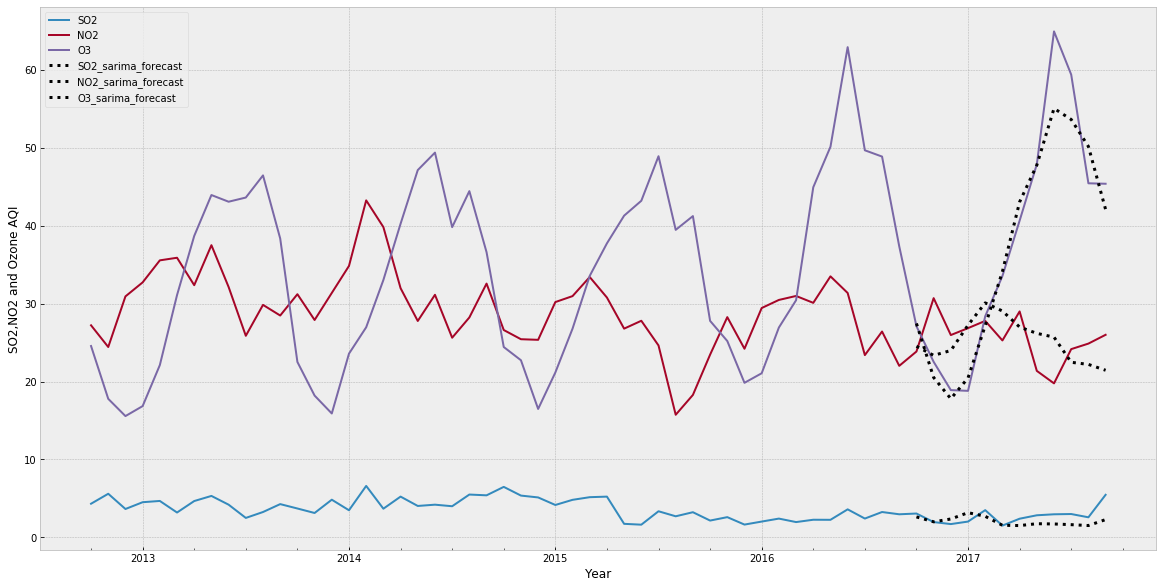

In [135]:
plt.figure()
axis = prediction_2016_observed.loc['2012-10-31':].plot(figsize = (20,10))
prediction_2016_forecast.plot(ax=axis, c= 'k', ls = ':', lw=3)
axis.set_xlabel('Year')
axis.set_ylabel('SO2,NO2 and Ozone AQI')

In [154]:
prediction_2010_observed = chicago_pollutants[['PM10','PM25','CO']][:'2013-1-31']
prediction_2010_forecast = pd.DataFrame({'PM10_sarima_forecast':PM10_trans_sarima_forecast,
                                         'PM25_sarima_forecast': PM25_sarima_forecast
                                        },index = PM10_sarima_test.index)
prediction_2012_forecast = pd.DataFrame(CO_trans_sarima_forecast, columns = ['CO_sarima_forecast'],
                                        index = CO_sarima_test.index)

Text(0,0.5,'PM10, PM2.5 and CO AQI')

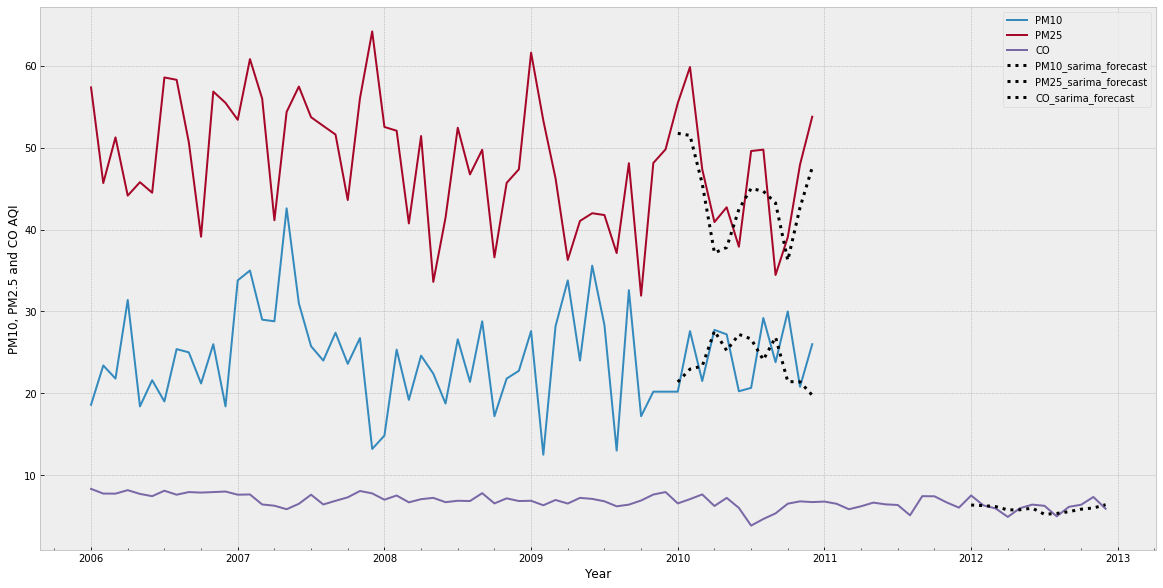

In [155]:
plt.figure()
axis = prediction_2010_observed.loc['2006-01-31':].plot(figsize = (20,10))
prediction_2010_forecast.plot(ax=axis, c= 'k', ls = ':', lw=3)
prediction_2012_forecast.plot(ax = axis, c = 'k',ls = ':',lw =3)
axis.set_xlabel('Year')
axis.set_ylabel('PM10, PM2.5 and CO AQI')

In [ ]:
prediction_2012_observed = chicago_pollutants['CO']
prediction_2012_forecast = pd.DataFrame({'CO_sarima_forecast':PM10_trans_sarima_forecast,
                                         'PM25_sarima_forecast': PM25_sarima_forecast,
                                        },index = PM10_sarima_test.index)